In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path = 'C:/Users/buckl/dev/Anna-BT-Project-Data-Analysis/bt/michaelmas/Winter temperature -Cork.csv'

In [4]:
sun_hours_michaelmas = {}

dec =[]
jan = []
feb = []



In [5]:
with open(path,'r') as file:
    data = file.read().splitlines()
    header = data[0].split(',')
    year = 0
    for i,col in enumerate(header):
        
        if 'Sep' in col:
            sun_hours_michaelmas[2023-year] = float(data[1].split(',')[i][:-10])
            year+=1
    
    year = 0 
    for i,col in enumerate(header):

        if 'Dec' in col:
            dec.append(float(data[-1].split(',')[i]))
        if 'Jan' in col:
            jan.append(float(data[-1].split(',')[i]))
        if 'Feb' in col:
            feb.append(float(data[-1].split(',')[i]))
            


In [6]:
winters = pd.DataFrame({'Dec':dec,'Jan':jan,'Feb':feb},index=sun_hours_michaelmas.keys())

In [7]:
winters["Mean"] = winters[["Dec", "Jan", "Feb"]].mean(axis=1)

In [8]:
winters['Total sunlight'] = winters[["Dec","Jan","Feb"]].sum(axis=1)

In [9]:
sun_hours_michaelmas = pd.DataFrame({'hours sun':sun_hours_michaelmas.values()},index=sun_hours_michaelmas.keys())

In [10]:
winters

,Dec,Jan,Feb,Mean,Total sunlight
2023,9.783871,7.487097,10.768966,9.346644,28.039933
2022,7.222581,8.609677,9.789286,8.540515,25.621544
2021,9.506667,9.058065,10.110714,9.558482,28.675445
2020,7.929032,7.193548,8.185714,7.769432,23.308295
2019,8.822581,8.674194,8.965517,8.820764,26.462291
2018,10.545161,8.241935,9.775000,9.520699,28.562097
2017,8.848387,9.038710,6.875000,8.254032,24.762097
2016,9.738710,8.541935,9.389286,9.223310,27.669931
2015,11.012903,8.596774,8.062069,9.223915,27.671746
2014,8.816129,8.374194,7.703571,8.297965,24.893894


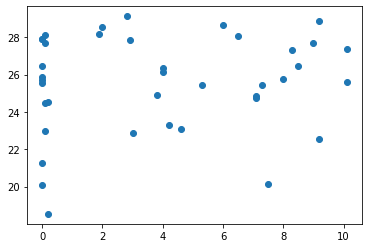

In [11]:
plt.scatter(sun_hours_michaelmas['hours sun'],winters['Total sunlight'])

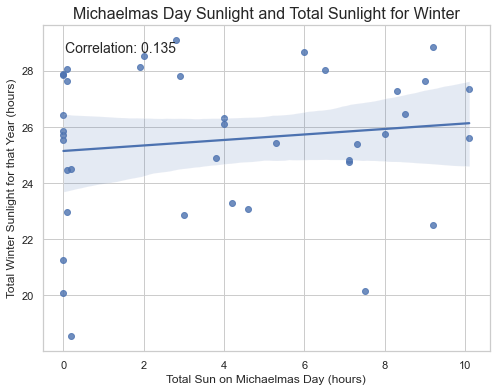

In [14]:
corr = np.corrcoef(sun_hours_michaelmas['hours sun'],winters['Total sunlight'])[-1,0]
# Set the style for the plot
sns.set_theme(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(8, 6))
sns.regplot(x=sun_hours_michaelmas['hours sun'], y=winters['Total sunlight'])

plt.text(0.05, 0.95, f'Correlation: {corr:.3f}', transform=plt.gca().transAxes, fontsize=14, verticalalignment='top')

# Add title and labels
plt.title('Michaelmas Day Sunlight and Total Sunlight for Winter', fontsize=16)
plt.xlabel('Total Sun on Michaelmas Day (hours)', fontsize=12)
plt.ylabel('Total Winter Sunlight for that Year (hours)', fontsize=12)

# Show the plot
plt.show()